In [1]:
import mysql.connector as connection
import pandas as pd
from sqlalchemy import create_engine

mysql_engine = create_engine('mysql+mysqlconnector://root:@localhost:3306/plotingdb', echo=True)
query = "select * from ranges order by snapshot_date asc, society asc;"
result_dataFrame = pd.read_sql(query,con=mysql_engine)

2023-03-04 23:49:52,117 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2023-03-04 23:49:52,121 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-03-04 23:49:52,127 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2023-03-04 23:49:52,128 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-03-04 23:49:52,132 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2023-03-04 23:49:52,133 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-03-04 23:49:52,142 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2023-03-04 23:49:52,144 INFO sqlalchemy.engine.Engine [generated in 0.00346s] {'table_schema': 'plotingdb', 'table_name': 'select * from ranges order by snapshot_date asc, society asc;'}
2023-03-04 23:49:52,156 INFO sqlalchemy.engine.Engine select * from ranges order by snapshot_date asc, society asc;
2023-03-04 23:49:52,157 INFO sqlalchemy.engine.Engine [raw sql] {}


In [2]:
result_dataFrame.head()

,id,snapshot_date,status,society,min_limit,max_limit,next_number
0,1,2022-07-01,active,aaa,500,1000,500
1,2,2022-07-01,active,bbb,500,1000,568
2,3,2022-07-01,active,ccc,500,1000,623
3,4,2022-07-02,active,aaa,500,1000,520
4,5,2022-07-02,active,bbb,500,1000,600


2023-03-05 00:23:52,227 INFO sqlalchemy.engine.Engine SELECT DATABASE()
2023-03-05 00:23:52,230 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-03-05 00:23:52,239 INFO sqlalchemy.engine.Engine SELECT @@sql_mode
2023-03-05 00:23:52,240 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-03-05 00:23:52,245 INFO sqlalchemy.engine.Engine SELECT @@lower_case_table_names
2023-03-05 00:23:52,247 INFO sqlalchemy.engine.Engine [raw sql] {}
2023-03-05 00:23:52,256 INFO sqlalchemy.engine.Engine SELECT COUNT(*) FROM information_schema.tables WHERE table_schema = %(table_schema)s AND table_name = %(table_name)s
2023-03-05 00:23:52,258 INFO sqlalchemy.engine.Engine [generated in 0.00374s] {'table_schema': 'plotingdb', 'table_name': 'select distinct (snapshot_date) from (ranges) order by snapshot_date asc;'}
2023-03-05 00:23:52,273 INFO sqlalchemy.engine.Engine select distinct (snapshot_date) from (ranges) order by snapshot_date asc;
2023-03-05 00:23:52,275 INFO sqlalchemy.engine.Engine [raw sql] {}
2023

ValueError: x and y must have same first dimension, but have shapes (7,) and (1,)

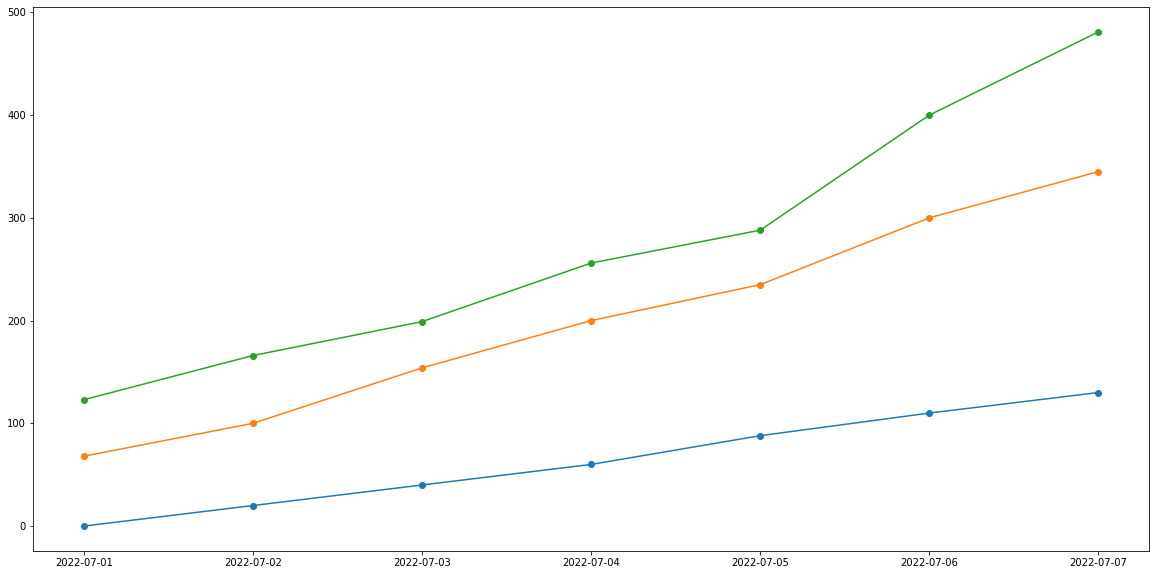

In [10]:
#///////////////////////////////// PLOT RANGES OVER TIME \\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\\
from dataclasses import dataclass
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates
import numpy as np

_enable_print = True

@dataclass
class PlotData(object):
   society : str
   date_ranges : np.array([])
   next_numbers : []



# Contains the required data for plotting
# a key for each society wich contains the list of actual values for each date in the dates
# the key 'dates' contains all the dates to plot, x ticks basically
time_series_data = {'dates':np.array([])}




mysql_engine = create_engine('mysql+mysqlconnector://root:@localhost:3306/plotingdb', echo=True)
unique_dates = "select distinct (snapshot_date) from (ranges) order by snapshot_date asc;"
unique_societies = "select distinct (society) from (ranges) order by society asc;"
query_ranges = "select * from ranges order by snapshot_date asc, society asc;"
result_dates = pd.read_sql(unique_dates,con=mysql_engine)
result_societies = pd.read_sql(unique_societies,con=mysql_engine)

# Fetch all the dates in the database
# Fetcj all the societies in the database
a = np.unique(result_dataFrame['snapshot_date'].values)
b = np.unique(result_dataFrame['society'].values)


for row in a:
    # TODO call to obtain all the data for each day and all societies
    #    for each society add to plot data, if not society there add 0 values
    if _enable_print:
        print(row)

for row in b:
    if _enable_print:
        print(row)

result_ranges = pd.read_sql(query_ranges,con=mysql_engine)

# TODO
#
#  en cada iteracion agregar al mapa correrto de la sociedad y los datos (fecha-cantidad)
# agregar un rango donde el total sea siempre el limite suoperior
# restar el minimo a todas las cantidades
# graficar al final de todas las iteraciones






for row in result_ranges.itertuples():
    if _enable_print:
        print(row)
    if not row.society in time_series_data:
        time_series_data[row.society] = np.array([row.next_number-row.min_limit])
        time_series_data['dates'] = np.append(time_series_data['dates'], [datetime.combine(row.snapshot_date, datetime.min.time())])
    else:
        time_series_data[row.society] = np.append(time_series_data[row.society], [row.next_number-row.min_limit])
        time_series_data['dates'] = np.append(time_series_data['dates'], [datetime.combine(row.snapshot_date, datetime.min.time())])

# Remove duplicates
time_series_data['dates'] = list(dict.fromkeys(time_series_data['dates']))
if _enable_print:
    print(time_series_data)

# Plot
plt.figure(figsize=(20.0, 10.0))
dates = time_series_data["dates"]
for key,value in time_series_data.items():
    if key != 'dates':# ignore 'dates' key data
        plt.plot(dates,value,marker='o', label=key)
ax = plt.gca()
#ax.set_xlim([xmin, xmax])
#ax.set_ylim([ymin, ymax])
myFmt = mdates.DateFormatter('%Y-%m-%d')
ax.xaxis.set_major_formatter(myFmt)
# Labelling
plt.xlabel("Date")
plt.ylabel("Percentage over time")
plt.title("Pandas Time Series Plot")
# Y axes limit
plt.ylim((0,1000))
plt.xticks(rotation=30, ha='right')

# Add legend
plt.legend()

# Auto space
plt.tight_layout()

# Display plot
plt.show()